## **ARTIFICIAL NEURAL NETWORKS**

### Goal:

To build an intelligent system that can automatically detect whether an underwater sonar signal is reflected from a metallic mine (potentially dangerous) or a harmless rock.

### 1. Data Exploration and Preprocessing

●	Begin by loading and exploring the "Alphabets_data.csv" dataset. Summarize its key features such as the number of samples, features, and classes.


●	Execute necessary data preprocessing steps including data normalization, managing missing values.

In [80]:
!pip install scikeras

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [83]:
!pip install --upgrade scikit-learn scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 68.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [43]:
df=pd.read_csv('sonardataset.csv')

In [44]:
df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,Y
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [45]:
df.shape

(208, 61)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     208 non-null    float64
 1   x_2     208 non-null    float64
 2   x_3     208 non-null    float64
 3   x_4     208 non-null    float64
 4   x_5     208 non-null    float64
 5   x_6     208 non-null    float64
 6   x_7     208 non-null    float64
 7   x_8     208 non-null    float64
 8   x_9     208 non-null    float64
 9   x_10    208 non-null    float64
 10  x_11    208 non-null    float64
 11  x_12    208 non-null    float64
 12  x_13    208 non-null    float64
 13  x_14    208 non-null    float64
 14  x_15    208 non-null    float64
 15  x_16    208 non-null    float64
 16  x_17    208 non-null    float64
 17  x_18    208 non-null    float64
 18  x_19    208 non-null    float64
 19  x_20    208 non-null    float64
 20  x_21    208 non-null    float64
 21  x_22    208 non-null    float64
 22  x_

In [47]:
df.isnull().sum()

,0
x_1,0
x_2,0
x_3,0
x_4,0
x_5,0
...,...
x_57,0
x_58,0
x_59,0
x_60,0


In [48]:
df.duplicated().sum()

np.int64(0)

<Axes: >

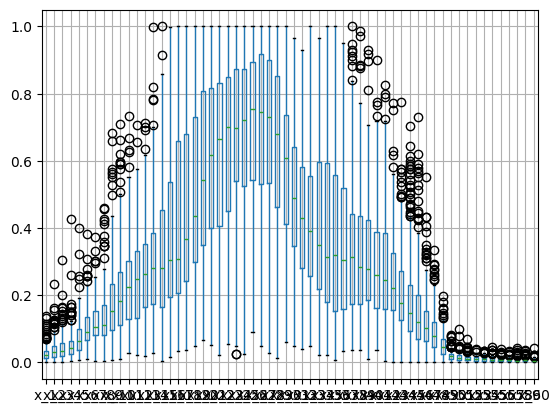

In [49]:
df.boxplot()

In [50]:
### outlier capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25) #It finds the value at the given percentile in the data. Q1=25%
    Q3=df[column].quantile(0.75) #Q3 = 75%
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)
# Each and every column is selected and done outlier capping

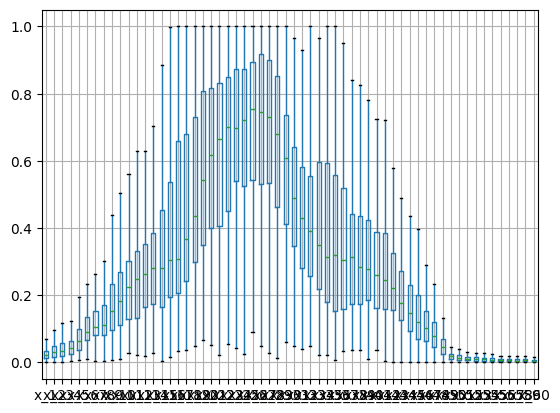

In [51]:
df.boxplot()
plt.show()

In [52]:
target=df[['Y']]
features=df.drop(columns=['Y'])

In [53]:
target.head()

,Y
0,R
1,R
2,R
3,R
4,R


In [54]:
features.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60
0,0.02000,0.0371,0.0428,0.0207,0.0954,0.098600,0.1539,0.160100,0.310900,0.211100,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.016700,0.018000,0.0084,0.0090,0.0032
1,0.04530,0.0523,0.0843,0.0689,0.1183,0.234775,0.2156,0.303362,0.333700,0.287200,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.019100,0.014000,0.0049,0.0052,0.0044
2,0.02620,0.0582,0.1099,0.1083,0.0974,0.228000,0.2431,0.303362,0.438025,0.504838,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.019838,0.020512,0.0164,0.0095,0.0078
3,0.01000,0.0171,0.0623,0.0205,0.0205,0.036800,0.1098,0.127600,0.059800,0.126400,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.007300,0.005000,0.0044,0.0040,0.0117
4,0.06885,0.0666,0.0481,0.0394,0.0590,0.064900,0.1209,0.246700,0.356400,0.445900,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.001500,0.007200,0.0048,0.0107,0.0094


In [55]:
label_enc=LabelEncoder()
target['Y']=label_enc.fit_transform(target)

In [56]:
target.head()

,Y
0,1
1,1
2,1
3,1
4,1


In [57]:
min_max_sca=MinMaxScaler()
features=pd.DataFrame(min_max_sca.fit_transform(features),columns=features.columns)

In [58]:
features.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60
0,0.274684,0.385835,0.359287,0.125329,0.474554,0.393632,0.578452,0.519031,0.704721,0.404832,...,0.588459,0.063123,0.205920,0.548046,0.281750,0.838585,0.875696,0.401487,0.440594,0.161868
1,0.650334,0.546512,0.720313,0.530754,0.597071,1.000000,0.815441,1.000000,0.757680,0.559025,...,0.317058,0.252492,0.288288,0.139770,0.375667,0.962058,0.677798,0.228005,0.252475,0.236576
2,0.366741,0.608879,0.943019,0.862160,0.485254,0.969832,0.921068,1.000000,1.000000,1.000000,...,0.083703,0.744186,0.552553,0.312644,0.742796,1.000000,1.000000,0.798017,0.465347,0.448249
3,0.126206,0.174419,0.528926,0.123646,0.073831,0.118446,0.409065,0.409921,0.121480,0.233214,...,0.611287,0.375415,0.106392,0.514943,0.337247,0.354984,0.232529,0.203222,0.193069,0.691051
4,1.000000,0.697674,0.405394,0.282620,0.279810,0.243571,0.451700,0.809770,0.810406,0.880582,...,0.395688,0.076412,0.168168,0.349425,0.443970,0.056592,0.341373,0.223048,0.524752,0.547860


### 2. Model Implementation

●	Construct a basic ANN model using your chosen high-level neural network library. Ensure your model includes at least one hidden layer.

●	Divide the dataset into training and test sets.

●	Train your model on the training set and then use it to make predictions on the test set.

In [59]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=42)

In [60]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(166, 60)
(166, 1)
(42, 60)
(42, 1)


In [61]:
epochs=10
batch_size=10
n_classes=1

In [62]:
tf.keras.backend.clear_session()
ann= tf.keras.models.Sequential()

In [63]:
features.shape

(208, 60)

In [64]:
60*2/3+10

50.0

In [65]:
50*2/3+10

43.333333333333336

In [66]:
### Input layer, first hidden layer
ann.add(tf.keras.layers.Dense(units=50,activation='relu',input_shape=[60]))

In [67]:
ann.add(tf.keras.layers.Dense(units=43,activation='relu'))

In [68]:
ann.add(tf.keras.layers.Dense(units=n_classes,activation='sigmoid'))

In [69]:
ann.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy'])

In [70]:
history=ann.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test,y_test))

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5528 - loss: 0.6781 - val_accuracy: 0.7619 - val_loss: 0.6166
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6437 - loss: 0.6252 - val_accuracy: 0.7619 - val_loss: 0.5807
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6785 - loss: 0.6027 - val_accuracy: 0.8333 - val_loss: 0.5454
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7551 - loss: 0.5675 - val_accuracy: 0.7857 - val_loss: 0.5313
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8009 - loss: 0.5379 - val_accuracy: 0.7381 - val_loss: 0.5215
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8177 - loss: 0.5109 - val_accuracy: 0.7857 - val_loss: 0.4969
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8344 - loss: 0.4974 - val_accuracy: 0.8333 - val_loss: 0.4495
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7570 - loss: 0.4798 - val_accuracy: 0.7857 - val_loss

In [71]:
val_loss,val_acc=ann.evaluate(x_test,y_test) # to see the final validation loss and validation accuracy
print('val_loss:',val_loss,'val_acc:',val_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8472 - loss: 0.4076
val_loss: 0.41188475489616394 val_acc: 0.8333333134651184


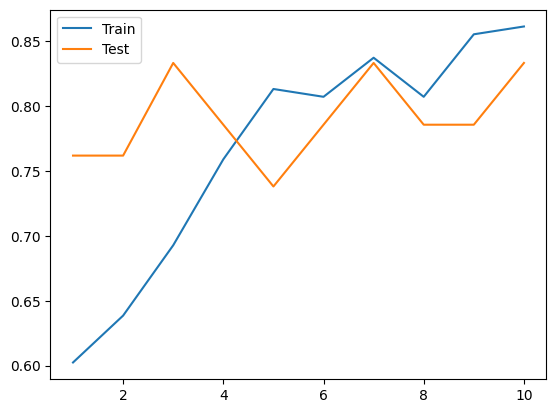

In [72]:
plt.plot(range(1,11),history.history['accuracy'],label=['Train'])
plt.plot(range(1,11),history.history['val_accuracy'],label=['Test'])
plt.legend()

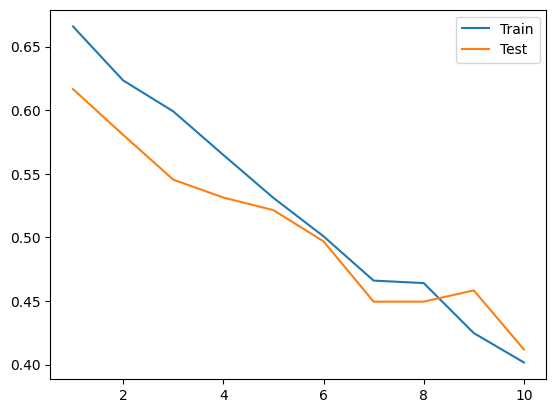

In [73]:
plt.plot(range(1,11),history.history['loss'],label=['Train'])
plt.plot(range(1,11),history.history['val_loss'],label=['Test'])
plt.legend()

In [74]:
ann.evaluate(x_train,y_train)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8666 - loss: 0.3789 


[0.3791123032569885, 0.8855421543121338]

In [75]:
### Our model has a good training as well as testing accuracy, so there is no need to use Dropout method

### 3. Hyperparameter Tuning

●	Modify various hyperparameters, such as the number of hidden layers, neurons per hidden layer, activation functions, and learning rate, to observe their impact on model performance.

●	Adopt a structured approach like grid search or random search for hyperparameter tuning, documenting your methodology thoroughly.

In [76]:
def create_ann_model(units_1=50, units_2=43, activation='relu'):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=units_1, activation=activation, input_shape=[60]))
    model.add(tf.keras.layers.Dense(units=units_2, activation=activation))
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
    return model

In [77]:
keras_estimator = KerasClassifier(
    model=create_ann_model,
    verbose=0
)

In [78]:
param_grid = {
    'model__units_1': [40, 60],
    'model__units_2': [30, 50],
    'batch_size': [10, 20],
    'epochs': [20, 50]
}
grid_search = GridSearchCV(
    estimator=keras_estimator,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3
)

In [79]:
grid_result = grid_search.fit(x_train, y_train.values.ravel())

In [80]:
print("\n## Grid Search Results 🏆")
print(f"Best: {grid_result.best_score_:.4f} using {grid_result.best_params_}")


## Grid Search Results 🏆
Best: 0.8075 using {'batch_size': 10, 'epochs': 50, 'model__units_1': 40, 'model__units_2': 30}


In [81]:
best_model = grid_result.best_estimator_
test_accuracy = best_model.score(x_test, y_test.values.ravel())
print(f"Test Accuracy of Best Model: {test_accuracy:.4f}")

Test Accuracy of Best Model: 0.8095


### 4. Evaluation

●	Employ suitable metrics such as accuracy, precision, recall, and F1-score to evaluate your model's performance.

●	Discuss the performance differences between the model with default hyperparameters and the tuned model, emphasizing the effects of hyperparameter tuning.

In [93]:
y_pred=ann.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [96]:
y_pred_binary = (y_pred > 0.5).astype(int)

In [94]:
y_pred[20]

array([0.1324523], dtype=float32)

In [97]:
print(classification_report(y_test,y_pred_binary))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86        26
           1       0.74      0.88      0.80        16

    accuracy                           0.83        42
   macro avg       0.82      0.84      0.83        42
weighted avg       0.85      0.83      0.84        42



In [100]:
### The model performs well and gives the best parameters after doing hyperparameter tuning